# Linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MyLineReg():
    def __init__(self, n_iter=100, learning_rate=0.1, weights=None):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = None
        
        
    def __str__(self):
        params = ", ".join(f"{key}={value}" for key, value in self.__dict__.items())
        return f"{__class__.__name__} class: {params}"
    
    
    def MSE(self, y_pred, y):
        return np.sum((y_pred - y)**2 / len(y))
    
    
    def prediction(self, X):
        return X @ self.weights
    
    
    def printLog(self, iter, y_pred, y):
        print(f"iter: {iter} \tloss: {self.MSE(y_pred, y)}")
        
    
    def fit(self, X, y, verbose=False):
        X = np.insert(X, 0, np.ones(len(X)), axis=1)
        self.weights = np.ones(X.shape[1])
        
        for iter in range(self.n_iter):
            y_pred = self.prediction(X)
            grad = 2*(y_pred - y) @ X / len(X)
            self.weights -= self.learning_rate * grad
            
            if verbose and iter % verbose == 0:
                self.printLog(iter, y_pred, y)
            
            
    def get_coef(self):
        return self.weights[1::]

In [3]:
x = np.random.rand(100) * 10
y = 2*x + 1 + np.random.randn(100) * 2

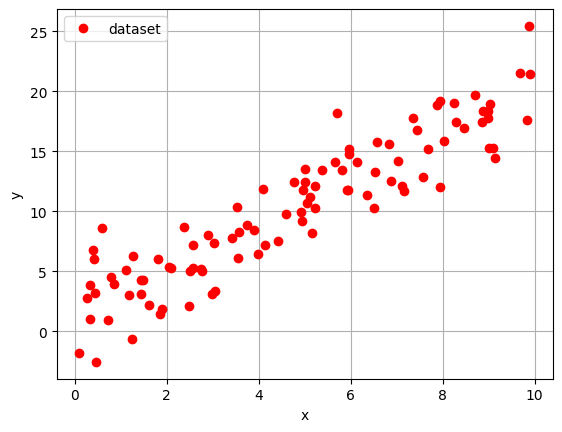

In [4]:
def drawDataset(x, y):
    plt.plot(x, y, 'ro', label='dataset')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

drawDataset(x, y)
plt.show()

In [5]:
X = np.reshape(x, (100, 1))
myLineReg = MyLineReg(100, 0.001)
myLineReg.fit(X, y, 10)

iter: 0 	loss: 32.4890561041208
iter: 10 	loss: 12.753357604280863
iter: 20 	loss: 7.402947543747389
iter: 30 	loss: 5.952396152557466
iter: 40 	loss: 5.5590987378246925
iter: 50 	loss: 5.452423893762381
iter: 60 	loss: 5.423453096861556
iter: 70 	loss: 5.415548436578095
iter: 80 	loss: 5.413355344517641
iter: 90 	loss: 5.412711184813045


In [6]:
weights = myLineReg.weights
weights

array([1.15017013, 1.91220939])

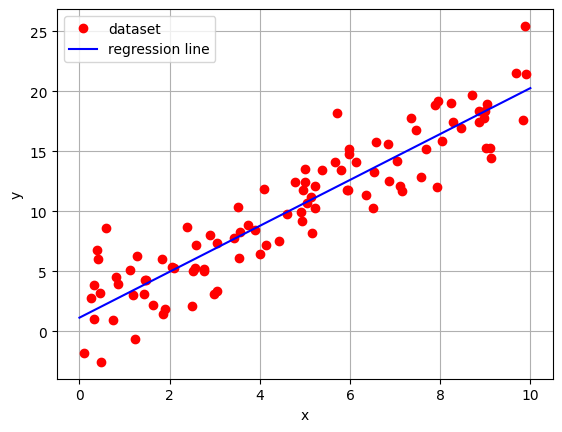

In [7]:
x_line = np.linspace(0, 10, 100)
y_line = weights[1] * x_line + weights[0]

drawDataset(x, y)
plt.plot(x_line, y_line, 'b-', label="regression line")
plt.legend()
plt.show()